In [63]:
from __future__ import absolute_import, division, print_function
import os
import cv2
import warnings
import numpy as np   # Linear Algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
path = "D://datasets/Kaggle/malariaCellImagesDataset/cell-images-for-detecting-malaria/cell_images"
directorio = (os.listdir(path))
print(directorio)

['Parasitized', 'Uninfected']


In [64]:
infected = os.listdir(path + "/Parasitized/")
uninfected = os.listdir(path + "/Uninfected/")

In [65]:
data = []
labels = []
for i in infected:
    try:
        image = cv2.imread(path + "/Parasitized/" + i)
        image_array = Image.fromarray(image, "RGB")
        resize_img = image_array.resize((50, 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img), (10, 10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)        
        labels.append(1)        
        labels.append(1)
        
    except AttributeError:
        print("")

In [66]:
for u in uninfected:
    try:
        image = cv2.imread(path + "/Uninfected/" + u)
        image_array = Image.fromarray(image, "RGB")
        resize_img = image_array.resize((50, 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)        
        labels.append(0)        
    
    except AttributeError:
        print("")

In [67]:
cells = np.array(data)
labels = np.array(labels)

In [68]:
np.save("Cells", cells)
np.save("Lavels", labels)

In [69]:
print("Cells : {} | Labels : {}".format(cells.shape, labels.shape))

Cells : (96453, 50, 50, 3) | Labels : (96453,)


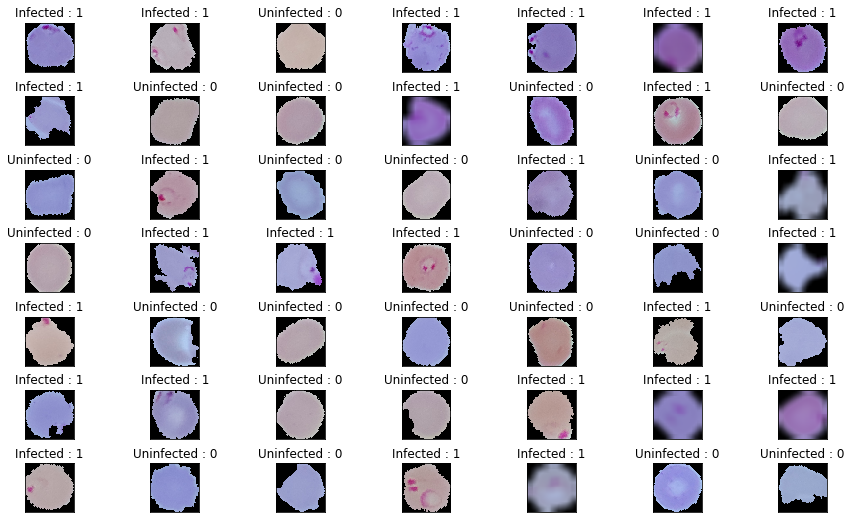

In [70]:
plt.figure(1, figsize = (15, 9))
n = 0
for i in range(49):
    n += 1
    r = np.random.randint(0, cells.shape[0], 1)
    plt.subplot(7, 7, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title("{} : {}".format("Infected" if labels[r[0]] == 1 else "Uninfected", labels[r[0]]))
    plt.xticks([]), plt.yticks([])

plt.show()

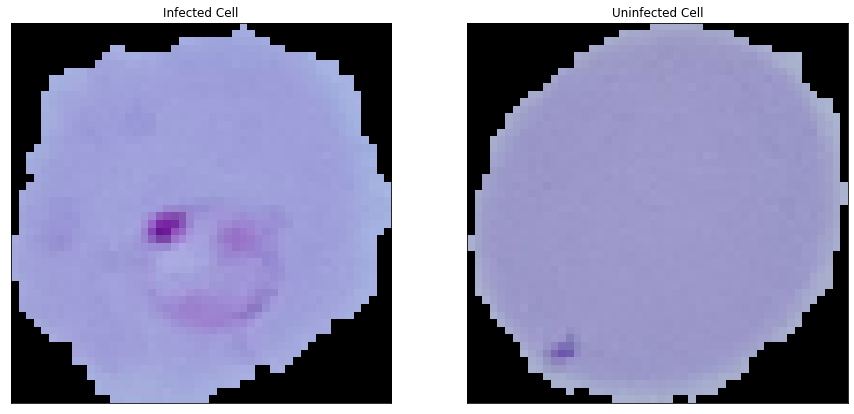

In [71]:
plt.figure(1, figsize = (15, 7))
plt.subplot(1, 2, 1)
plt.imshow(cells[0])
plt.title("Infected Cell")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cells[60000])
plt.title("Uninfected Cell")
plt.xticks([]), plt.yticks([])

plt.show()

In [72]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [ ]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells / 255